In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import shap
import joblib

shap.initjs()

In [2]:
dataset_path = Path("./dataset")
result_path = Path("./results")

print([_.name for _ in dataset_path.iterdir()])
print([_.name for _ in result_path.iterdir()])

['data_description.txt', 'train.csv', '.ipynb_checkpoints', 'test_ftrs_added.csv', 'train_with_folds.csv', 'test.csv', 'sample_submission.csv', 'test_with_folds.csv', 'train_ftrs_added.csv']
['test_v2_le.csv', '.ipynb_checkpoints', 'submission.csv', 'test_with_blend.csv', 'rfr_best_params.csv', 'rfr_best_params.json', 'rfr_best_params.z', 'train_v2.csv', 'test_v1_wo_ohe.csv', 'xgb_model_baseline.gz', 'subm1_with_imp_ftrs.csv', 'subm2.csv', 'test_v2.csv', 'train_v1_wo_ohe.csv', 'train_v2_le.csv', 'subm1.csv', 'train_with_blend.csv', 'xgb_baseline.csv']


In [3]:
train_df = pd.read_csv(result_path / "train_v2_le.csv")
test_df = pd.read_csv(result_path / "test_v2_le.csv")

In [4]:
useful_cols = [col for col in train_df.columns if col not in ["Id", "SalePrice", "log_SalePrice", "fold_no"]]
print(len(useful_cols))

79


In [5]:
model = joblib.load(result_path/"xgb_model_baseline.gz")
model

XGBRegressor(alpha=0.0012048267608698896, base_score=0.5, booster='gbtree',
             callbacks=None, colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.5124265224039863, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=0,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', lambda=9.389300430871108,
             learning_rate=0.01261821402911002, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=11, max_leaves=0,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=13, ...)

In [6]:
explainer = shap.Explainer(model)
shap_values = explainer(train_df[useful_cols])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


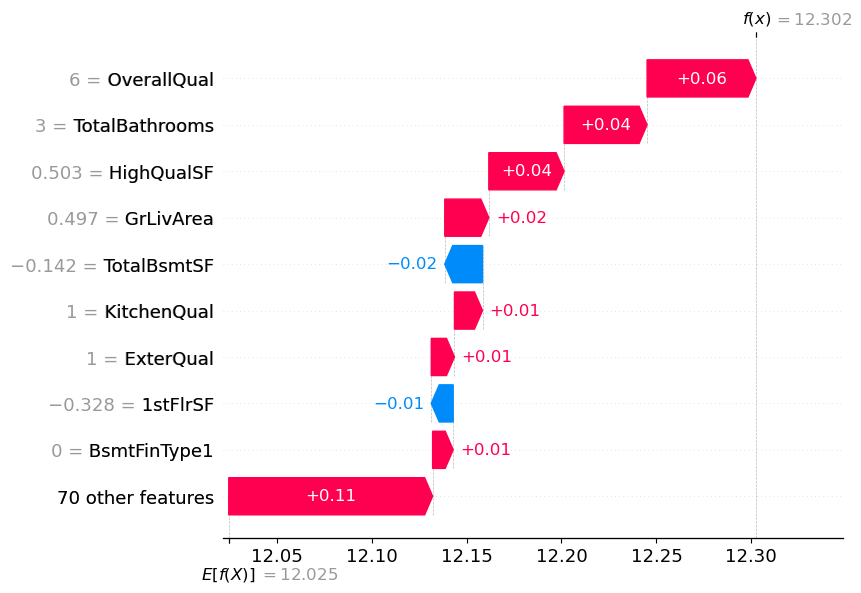

In [20]:
shap.plots.waterfall(shap_values[2])

In [22]:
shap.plots.force(shap_values[0])

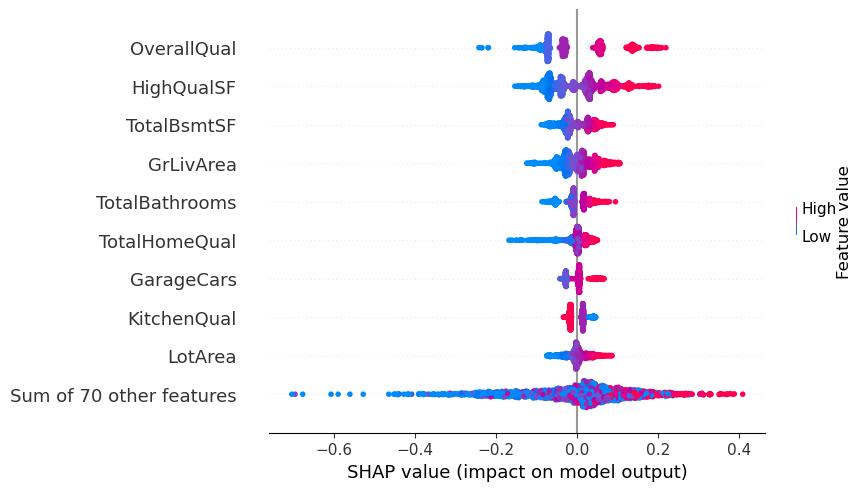

In [34]:
shap.plots.beeswarm(shap_values)

In [33]:
shap.plots.bar(shap_values.abs.values.sum(axis=0))

AssertionError: You must pass an Explanation object, Cohorts object, or dictionary to bar plot!